Imports / Connecting to drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import torch
from torchvision import transforms
import pandas as pd
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('braille_data_proper.csv')
df["Image Object"] = pd.NaT


# Loading Data and Pre-Processing

In [ ]:
for index, row in df.iterrows():
  try:
    # img = Image.open("gdrive/MyDrive/ECE324_Project/data/character_data/" + row.filename)
    img = Image.open(row.filename)
    if index < 566:
      df.at[index, "Image Object"] = img
    if index >= 566:
      try:
        changed = transforms.RandAugment()(img)
        df.at[index, "Image Object"] = changed
      except OSError:
        pass
  except FileNotFoundError:
    print("not found")
    pass

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


Greyscaling the image and constructing the normal histogram of the given image and the normalized histogram



In [ ]:
df = df.dropna(subset = ['Image Object']).reset_index(drop=True)

In [ ]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(df[['label']]).toarray())
encoder_df.columns = encoder.get_feature_names_out(['label'])
final_df = df.join(encoder_df)
final_df

,filename,label,Image Object,"label_,",label_.,label_?,label_a,label_b,label_c,label_caps,...,label_m,label_n,label_o,label_p,label_r,label_s,label_t,label_u,label_w,label_y
0,IMG2549_6.jpg,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IMG2549_10.jpg,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IMG2549_54.jpg,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IMG2549_70.jpg,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IMG2549_105.jpg,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,IMG2554_22.jpg,caps,<PIL.Image.Image image mode=RGBA size=70x114 a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,IMG2555_75.jpg,caps,<PIL.Image.Image image mode=RGBA size=70x114 a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,IMG2561_20.jpg,caps,<PIL.Image.Image image mode=RGBA size=70x114 a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,IMG2550_21.jpg,caps,<PIL.Image.Image image mode=RGBA size=70x114 a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = final_df['Image Object']
#y = final_df['label']
y = final_df[final_df.columns[3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train =  X_train.reset_index(drop=True), y_train.reset_index(drop=True)
X_test, y_test =  X_test.reset_index(drop=True), y_test.reset_index(drop=True)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [ ]:
transform1 = transforms.Compose([
    # resize
    transforms.Resize((28, 28)),
    # grayscale
    transforms.Grayscale(num_output_channels=1),
    # to-tensor
    transforms.ToTensor()
])

In [ ]:
class MyDataset(torch.utils.data.Dataset):

  def __init__(self, X, y, transform=None):
    self.X = X
    self.y = y
    self.transform = transform

  def __len__(self):
    return len(self.y)
  
  def __getitem__(self, i):
    label = torch.argmax(self.y[i])
    image = self.X[i]
    if self.transform:
        image = self.transform(image)
    return (image, label)

In [388]:
train_data = MyDataset(X_train, y_train, transform1)
test_data = MyDataset(X_test, y_test, transform1)

In [ ]:
train_loader = DataLoader(train_data, batch_size=20, shuffle=True, num_workers=1, drop_last=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=True, num_workers=1, drop_last=True)

Length of data set:  33 

Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


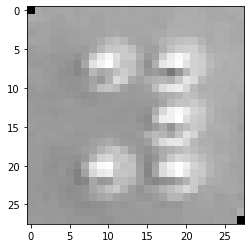

Label: 24
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


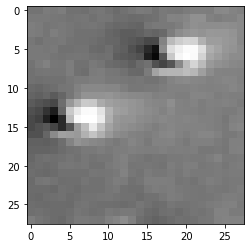

Label: 12
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


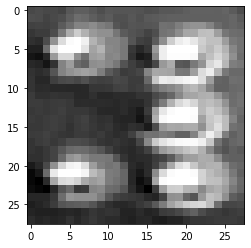

Label: 24
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


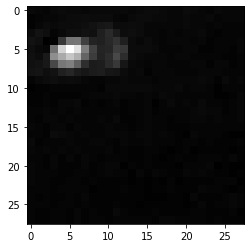

Label: 3
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


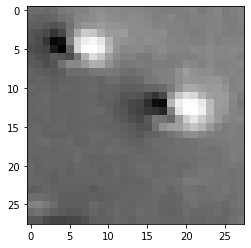

Label: 8
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


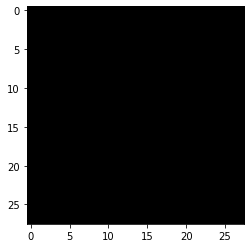

Label: 17
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


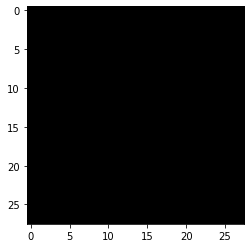

Label: 16
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


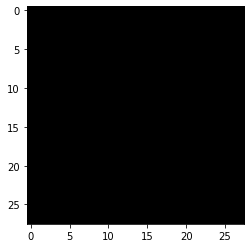

Label: 8
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


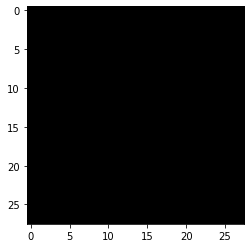

Label: 3
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


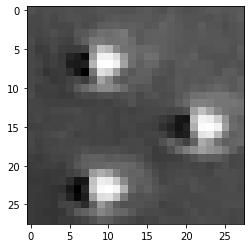

Label: 17
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


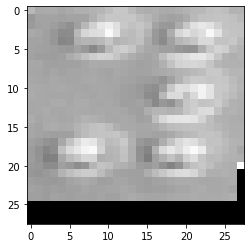

Label: 24
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


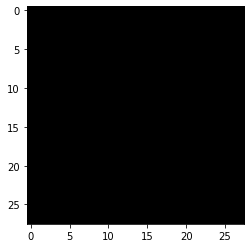

Label: 13
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


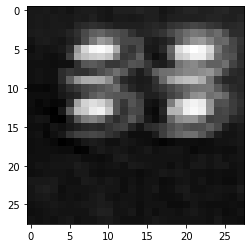

Label: 10
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


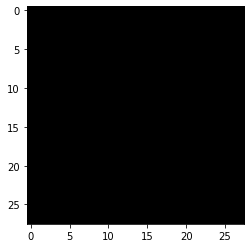

Label: 5
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


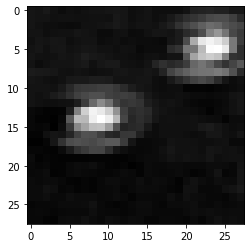

Label: 12
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


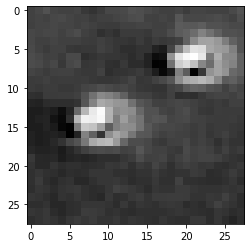

Label: 12
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


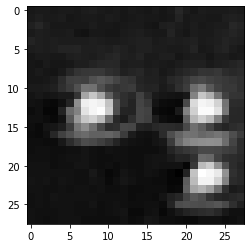

Label: 1
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


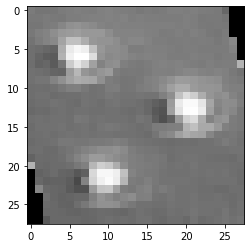

Label: 17
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


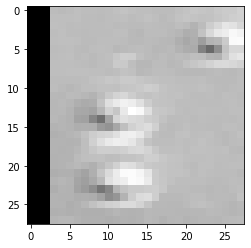

Label: 20
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


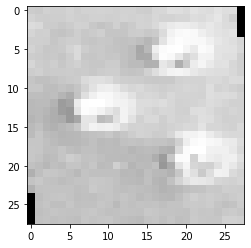

Label: 17
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


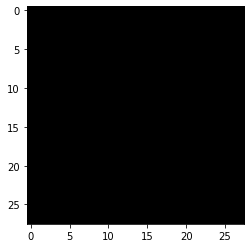

Label: 12
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


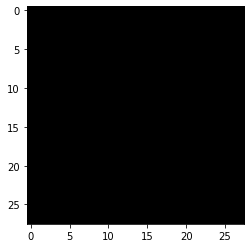

Label: 20
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


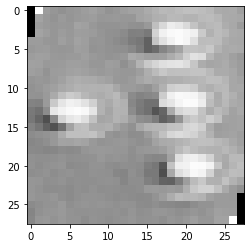

Label: 23
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


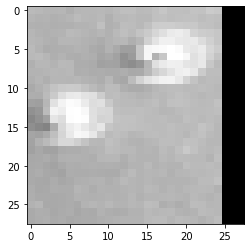

Label: 12
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


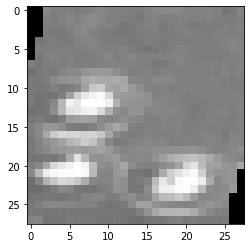

Label: 2
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


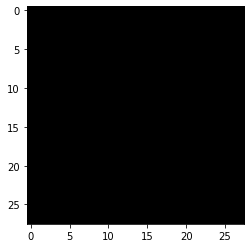

Label: 19
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


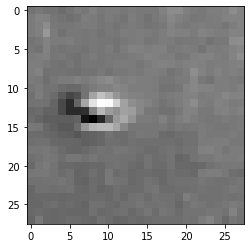

Label: 0
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


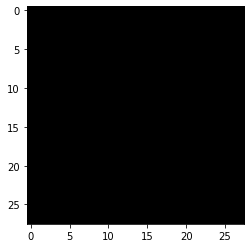

Label: 19
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


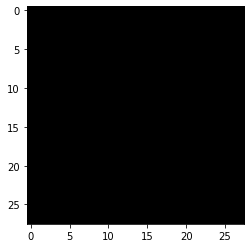

Label: 9
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


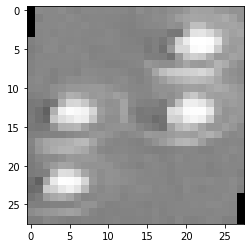

Label: 21
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


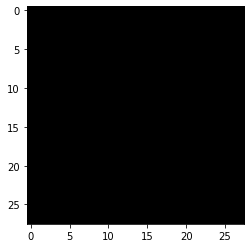

Label: 15
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


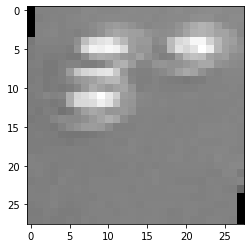

Label: 9
Feature batch shape: torch.Size([20, 1, 28, 28])
Labels batch shape: torch.Size([20])


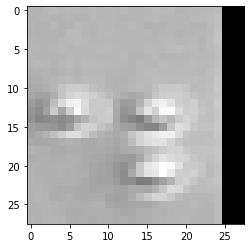

Label: 1


In [ ]:
print('Length of data set: ', len(train_loader), '\n')

for batch_idx, samples in enumerate(train_loader):
  train_features, train_labels = next(iter(train_loader))
  train_features, train_labels = next(iter(train_loader))
  print(f"Feature batch shape: {train_features.size()}")
  print(f"Labels batch shape: {train_labels.size()}")
  img = train_features[0].squeeze()
  label = train_labels[0]
  plt.imshow(img, cmap="gray")
  plt.show()
  print(f"Label: {label}")

# Model

In [ ]:
number_of_classes = 17
import torch.nn as nn
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv_1 = nn.Sequential(         
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding='same'),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding='same'),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer
        self.linear = nn.Linear(in_features = 32*7*7, out_features = number_of_classes)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)   
        x = self.linear(x)    
        output = self.softmax(x)
        return output



# Training

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
learning_rate = 0.001
model = ConvNet()
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs = 100
# batch = 16
device = 'cuda'

In [ ]:
def train(model, num_epochs, loader):
  model.train()
  total_step = len(loader)
  for epoch in range(num_epochs):
    for batch_idx, (image, target) in enumerate(loader):
        optimizer.zero_grad()
        y_pred = model(image)
        loss = criterion(y_pred, target)
        loss.backward()
        optimizer.step()
        if (batch_idx + 1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, batch_idx + 1, total_step, loss.item()))


In [ ]:
train(model, epochs, train_loader)

Epoch [1/100], Step [10/33], Loss: 3.2091
Epoch [1/100], Step [20/33], Loss: 3.1821
Epoch [1/100], Step [30/33], Loss: 3.2302
Epoch [2/100], Step [10/33], Loss: 3.2562
Epoch [2/100], Step [20/33], Loss: 3.1848
Epoch [2/100], Step [30/33], Loss: 3.1772
Epoch [3/100], Step [10/33], Loss: 3.1617
Epoch [3/100], Step [20/33], Loss: 3.1550
Epoch [3/100], Step [30/33], Loss: 3.1927
Epoch [4/100], Step [10/33], Loss: 3.2250
Epoch [4/100], Step [20/33], Loss: 3.2443
Epoch [4/100], Step [30/33], Loss: 3.2124
Epoch [5/100], Step [10/33], Loss: 3.1388
Epoch [5/100], Step [20/33], Loss: 3.1507
Epoch [5/100], Step [30/33], Loss: 3.1511
Epoch [6/100], Step [10/33], Loss: 3.2161
Epoch [6/100], Step [20/33], Loss: 3.1652
Epoch [6/100], Step [30/33], Loss: 3.2064
Epoch [7/100], Step [10/33], Loss: 3.1301
Epoch [7/100], Step [20/33], Loss: 3.1877
Epoch [7/100], Step [30/33], Loss: 3.1781
Epoch [8/100], Step [10/33], Loss: 3.1965
Epoch [8/100], Step [20/33], Loss: 3.1454
Epoch [8/100], Step [30/33], Loss:

# Testing

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
test(model, device, test_loader)

tensor([[ 5],
        [19],
        [14],
        [21],
        [17],
        [17],
        [ 0],
        [21],
        [19],
        [14],
        [14],
        [ 5],
        [ 1],
        [15],
        [ 5],
        [ 5],
        [ 6],
        [20],
        [21],
        [ 3]])
tensor([[19],
        [ 5],
        [22],
        [15],
        [21],
        [12],
        [15],
        [14],
        [14],
        [ 1],
        [14],
        [20],
        [ 6],
        [ 8],
        [20],
        [21],
        [20],
        [20],
        [14],
        [24]])
tensor([[15],
        [ 3],
        [24],
        [ 3],
        [20],
        [17],
        [19],
        [19],
        [17],
        [17],
        [15],
        [14],
        [19],
        [15],
        [14],
        [19],
        [19],
        [ 8],
        [ 3],
        [17]])
tensor([[ 8],
        [15],
        [ 3],
        [14],
        [17],
        [14],
        [17],
        [ 3],
        [ 8],
        [14],
        [19],
   

# Text to Speech

In [386]:
!pip install gTTS

In [387]:
from gtts import gTTS 
import os

image = Image.open('IMG2549_6.jpg')

new_img = torch.unsqueeze(transform1(image), dim=1)
output = model(new_img)

pred = output.argmax(dim=1, keepdim=True)
text = final_df.columns[3:][pred][-1]

language = 'en'
speech = gTTS(text = text, lang = language, slow = False)
speech.save("character.mp3")
os.system("start character.mp3")

32512